# Final Project Heart Attack Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier  

### Data Prepararation

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)

In [3]:
df=pd.read_csv("heart_csv.csv")

In [4]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_TOTINDA,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10,1,1.0,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,NaN,NaN,NaN,1,0.465411,460.002849,284.335672,1,2,3,2,1,2.0,2,2,1,1.0,2,NaN,1,1.0,1.0,2,1.0,1.0,1.0,1.0,2,8,1,56,5,67.0,170.0,4808.0,1660.0,1.0,1,1,4,1,1,2,2,0,1,0,1,NaN,NaN,1,1,9,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
df.shape

(401958, 279)

In [6]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_RFPSA23', '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA',
       '_VIRCOLN', '_SBONTIM', '_CRCREC1', '_AIDTST4'],
      dtype='object', length=279)

In [7]:
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 279 columns):
 #    Column    Dtype  
---   ------    -----  
 0    _STATE    int64  
 1    FMONTH    int64  
 2    IDATE     int64  
 3    IMONTH    int64  
 4    IDAY      int64  
 5    IYEAR     int64  
 6    DISPCODE  int64  
 7    SEQNO     int64  
 8    _PSU      int64  
 9    CTELENM1  float64
 10   PVTRESD1  float64
 11   COLGHOUS  float64
 12   STATERE1  float64
 13   CELPHONE  float64
 14   LADULT1   float64
 15   COLGSEX   float64
 16   NUMADULT  float64
 17   LANDSEX   float64
 18   NUMMEN    float64
 19   NUMWOMEN  float64
 20   RESPSLCT  float64
 21   SAFETIME  float64
 22   CTELNUM1  float64
 23   CELLFON5  float64
 24   CADULT1   float64
 25   CELLSEX   float64
 26   PVTRESD3  float64
 27   CCLGHOUS  float64
 28   CSTATE1   float64
 29   LANDLINE  float64
 30   HHADULT   float64
 31   SEXVAR    int64  
 32   GENHLTH   float64
 33   PHYSHLTH  float64
 34   MENTHLTH  float64


In [8]:
df.isnull().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
DISPCODE         0
SEQNO            0
_PSU             0
CTELENM1    277207
PVTRESD1    277207
COLGHOUS    401935
STATERE1    277207
CELPHONE    277207
LADULT1     277207
COLGSEX     401935
NUMADULT    277216
LANDSEX     350509
NUMMEN      291536
NUMWOMEN    291536
RESPSLCT    354532
SAFETIME    124751
CTELNUM1    124751
CELLFON5    124751
CADULT1     124755
CELLSEX     124771
PVTRESD3    124752
CCLGHOUS    400979
CSTATE1     124758
LANDLINE    124752
HHADULT     124753
SEXVAR           0
GENHLTH          8
PHYSHLTH         5
MENTHLTH         5
POORHLTH    200343
HLTHPLN1         3
PERSDOC2         3
MEDCOST          3
CHECKUP1         5
EXERANY2         3
SLEPTIM1         3
CVDINFR4         6
CVDCRHD4         3
CVDSTRK3         3
ASTHMA3          3
ASTHNOW     347817
CHCSCNCR         3
CHCOCNCR         3
CHCCOPD2         5
HAVARTH4         5
ADDEPEV3         6
CHCKDNY2    

In [9]:
# Count of number of columns having null values

df.isnull().any().sum()

229

## Selecting columns based on meta data

In [10]:
#Renaming columns

df.rename(columns = {'_MICHD':'X_MICHD', '_BMI5CAT':'X_BMI5CAT',
                              '_SMOKER3':'X_SMOKER3','_AGE_G':'X_AGE_G','_IMPRACE':'X_IMPRACE','_MENT14D':'X_MENT14D',
                        '_PHYS14D':'X_PHYS14D'}, inplace = True)

In [11]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,SHINGLE2,PNEUVAC4,FALL12MN,FALLINJ4,SEATBELT,DRNKDRI2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,COLNSCPY,COLNTEST,SIGMSCPY,SIGMTEST,BLDSTOL1,LSTBLDS4,STOOLDNA,SDNATEST,VIRCOLON,VCLNTEST,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HLTHCVR1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ECIGARET,ECIGNOW,MARIJAN1,USEMRJN2,RSNMRJN1,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PCPSADE1,PCDMDEC1,HPVADVC4,HPVADSHT,TETANUS1,IMFVPLA1,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,X_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,X_PHYS14D,X_MENT14D,_HCVU651,_TOTINDA,X_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_EXTETH3,_ALTETH3,_DENVST3,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,X_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,X_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,X_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,3.0,30.0,3.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,35.0,1.0,2.0,2.0,6.0,1.0,2.0,NaN,1.0,2.0,4.0,88.0,1.0,NaN,106.0,507.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,3.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,88.0,NaN,1.0,NaN,1.0,3.0,1.0,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,21994.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,10,1,1.0,1.0,1.0,11011,69.640207,1.0,69.640207,1,NaN,NaN,NaN,NaN,1,0.465411,460.002849,284.335672,1,2,3,2,1,2.0,2,2,1,1.0,2,NaN,1,1.0,1.0,2,1.0,1.0,1.0,1.0,2,8,1,56,5,67.0,170.0,4808.0,1660.0,1.0,1,1,4,1,1,2,2,0,1,0,1,NaN,NaN,1,1,9,2.0,2.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,88.0,88.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,99.0,NaN,170.0,504.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
# Selecting columns

new2_df = df[['X_MICHD','X_BMI5CAT','X_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'X_AGE_G','X_IMPRACE','EXERANY2','GENHLTH','ADDEPEV3','SLEPTIM1','ASTHMA3','X_MENT14D',
             'CHCKDNY2','CHCSCNCR','X_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
new2_df.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,2.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,2.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,2.0,NaN,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,2.0,NaN,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [13]:
new2_df.shape

(401958, 21)

## Analyzing categorical variables and replacing null values

In [14]:
new2_df.isnull().sum()

X_MICHD       3571
X_BMI5CAT    41357
X_SMOKER3        0
CVDSTRK3         3
SEXVAR           0
CVDINFR4         6
X_AGE_G          0
X_IMPRACE        0
EXERANY2         3
GENHLTH          8
ADDEPEV3         6
SLEPTIM1         3
ASTHMA3          3
X_MENT14D        0
CHCKDNY2         6
CHCSCNCR         3
X_PHYS14D        0
CHCOCNCR         3
CHCCOPD2         5
MARITAL         12
DIFFWALK     15280
dtype: int64

In [15]:
new3_df=new2_df.drop("SLEPTIM1",axis=1)

In [16]:
# Checking Target column

new2_df["X_MICHD"].unique() #here 2 means no and yes means 1, so that replacing it

array([ 2.,  1., nan])

In [17]:
new2_df["X_MICHD"] = new2_df["X_MICHD"].replace({2: 0, 1: 1})
#0 no 1 Yes
new2_df["X_MICHD"].unique()

array([ 0.,  1., nan])

In [18]:
columns_list=pd.Series(new3_df.columns)

In [19]:
def check_unique(l):
  for i in l:
    print("unnique values in  ",i,"is ", new2_df[i].unique())

In [20]:
check_unique(columns_list)

unnique values in   X_MICHD is  [ 0.  1. nan]
unnique values in   X_BMI5CAT is  [ 1.  3. nan  2.  4.]
unnique values in   X_SMOKER3 is  [1 9 4 3 2]
unnique values in   CVDSTRK3 is  [ 2.  1.  7.  9. nan]
unnique values in   SEXVAR is  [2 1]
unnique values in   CVDINFR4 is  [ 2.  7.  1.  9. nan]
unnique values in   X_AGE_G is  [5 6 3 4 1 2]
unnique values in   X_IMPRACE is  [1 2 3 4 6 5]
unnique values in   EXERANY2 is  [ 1.  2.  7. nan  9.]
unnique values in   GENHLTH is  [ 2.  3.  1.  4.  5.  7.  9. nan]
unnique values in   ADDEPEV3 is  [ 1.  2.  9. nan  7.]
unnique values in   ASTHMA3 is  [ 1.  2.  7.  9. nan]
unnique values in   X_MENT14D is  [3 1 2 9]
unnique values in   CHCKDNY2 is  [ 2.  1.  7. nan  9.]
unnique values in   CHCSCNCR is  [ 1.  2.  7.  9. nan]
unnique values in   X_PHYS14D is  [2 1 3 9]
unnique values in   CHCOCNCR is  [ 1.  2.  7.  9. nan]
unnique values in   CHCCOPD2 is  [ 1.  2.  7. nan  9.]
unnique values in   MARITAL is  [ 2.  3.  1.  4.  5.  6.  9. nan]
unnique

## Imputation

In [21]:
def replace_null(l):
  for i in l:
    new2_df[i]=new2_df[i].replace(np.nan,new2_df[i].mode()[0])

In [22]:
replace_null(columns_list)

In [23]:
new2_df.isna().sum()

X_MICHD      0
X_BMI5CAT    0
X_SMOKER3    0
CVDSTRK3     0
SEXVAR       0
CVDINFR4     0
X_AGE_G      0
X_IMPRACE    0
EXERANY2     0
GENHLTH      0
ADDEPEV3     0
SLEPTIM1     3
ASTHMA3      0
X_MENT14D    0
CHCKDNY2     0
CHCSCNCR     0
X_PHYS14D    0
CHCOCNCR     0
CHCCOPD2     0
MARITAL      0
DIFFWALK     0
dtype: int64

## Analysing Continuous Features

In [24]:
new2_df["SLEPTIM1"].isna().sum()

3

8.786135023047517
79.10382716620087


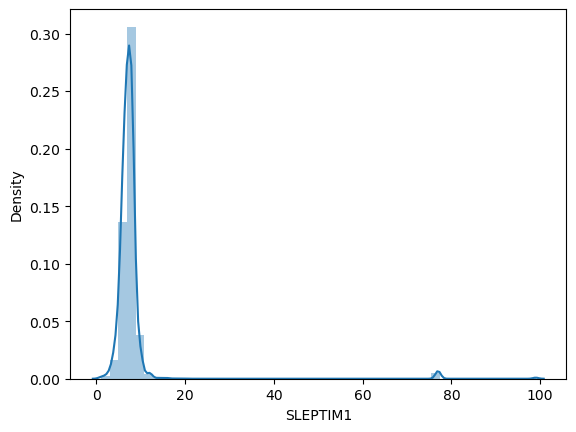

In [25]:
sns.distplot(new2_df["SLEPTIM1"])
print(new2_df["SLEPTIM1"].skew())
print(new2_df["SLEPTIM1"].kurt())

In [26]:
new2_df["SLEPTIM1"]=new2_df["SLEPTIM1"].replace(np.nan,new2_df["SLEPTIM1"].mean())

In [27]:
new2_df.head()

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,0.0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,1.0,5.0,1.0,3,2.0,1.0,2,1.0,1.0,2.0,2.0
1,0.0,3.0,9,2.0,2,2.0,6,2,1.0,3.0,1.0,7.0,1.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
2,0.0,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,7.0,2.0,1,2.0,2.0,1,1.0,2.0,1.0,2.0
3,0.0,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,6.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0
4,0.0,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,7.0,2.0,1,2.0,2.0,1,2.0,2.0,3.0,2.0


In [28]:
new2_df.shape

(401958, 21)

In [29]:
new2_df.isna().sum()

X_MICHD      0
X_BMI5CAT    0
X_SMOKER3    0
CVDSTRK3     0
SEXVAR       0
CVDINFR4     0
X_AGE_G      0
X_IMPRACE    0
EXERANY2     0
GENHLTH      0
ADDEPEV3     0
SLEPTIM1     0
ASTHMA3      0
X_MENT14D    0
CHCKDNY2     0
CHCSCNCR     0
X_PHYS14D    0
CHCOCNCR     0
CHCCOPD2     0
MARITAL      0
DIFFWALK     0
dtype: int64

### correlation matrix

In [30]:
corr_matrix = new2_df.corr()

In [31]:
corr_matrix

,X_MICHD,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,ADDEPEV3,SLEPTIM1,ASTHMA3,X_MENT14D,CHCKDNY2,CHCSCNCR,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
X_MICHD,1.000000,0.049549,-0.050744,-0.091553,-0.068824,-0.386751,0.209564,-0.035244,0.085397,0.234121,-0.029361,0.020932,-0.031996,0.016180,-0.054730,-0.063005,0.107203,-0.058540,-0.090333,-0.041095,-0.130386
X_BMI5CAT,0.049549,1.000000,0.003111,-0.008204,-0.068188,-0.016040,0.042929,0.024690,0.091934,0.172566,-0.045139,-0.007557,-0.044086,0.006612,-0.015908,0.012810,0.039303,-0.000615,-0.014246,-0.055039,-0.084735
X_SMOKER3,-0.050744,0.003111,1.000000,0.035654,0.035102,0.043277,-0.032494,0.034767,-0.043172,-0.102953,0.086945,0.023553,0.035595,-0.033517,0.024258,0.018194,-0.032561,0.028301,0.089245,-0.000294,0.110286
CVDSTRK3,-0.091553,-0.008204,0.035654,1.000000,-0.005287,0.255393,-0.055314,0.008144,-0.002525,-0.055428,0.167485,0.026995,0.213228,0.004326,0.242759,0.228644,-0.015907,0.227243,0.218770,0.022395,0.094089
SEXVAR,-0.068824,-0.068188,0.035102,-0.005287,1.000000,0.024955,0.064796,-0.004435,0.041426,0.024855,-0.087243,0.015764,-0.053074,0.071055,-0.004889,0.001671,0.036278,-0.028970,-0.022560,-0.002451,-0.044307
CVDINFR4,-0.386751,-0.016040,0.043277,0.255393,0.024955,1.000000,-0.068274,0.022647,0.004350,-0.055435,0.124561,0.037046,0.152658,0.023341,0.180464,0.180499,-0.004408,0.174889,0.179382,0.035157,0.075582
X_AGE_G,0.209564,0.042929,-0.032494,-0.055314,0.064796,-0.068274,1.000000,-0.205222,0.096785,0.183111,0.041787,0.045514,0.037041,-0.094849,-0.037065,-0.144230,0.076852,-0.136699,-0.074151,-0.342143,-0.141694
X_IMPRACE,-0.035244,0.024690,0.034767,0.008144,-0.004435,0.022647,-0.205222,1.000000,0.050164,0.049397,0.011743,0.009208,-0.015311,0.019475,0.006081,0.071496,0.014143,0.042007,0.021435,0.132379,-0.005302
EXERANY2,0.085397,0.091934,-0.043172,-0.002525,0.041426,0.004350,0.096785,0.050164,1.000000,0.250714,-0.019460,0.077310,-0.001800,0.065502,0.008556,0.025348,0.151122,-0.000063,-0.038825,0.032130,-0.135494
GENHLTH,0.234121,0.172566,-0.102953,-0.055428,0.024855,-0.055435,0.183111,0.049397,0.250714,1.000000,-0.117906,0.064434,-0.078705,0.166632,-0.043745,-0.019010,0.329480,-0.072358,-0.118625,0.035092,-0.254503


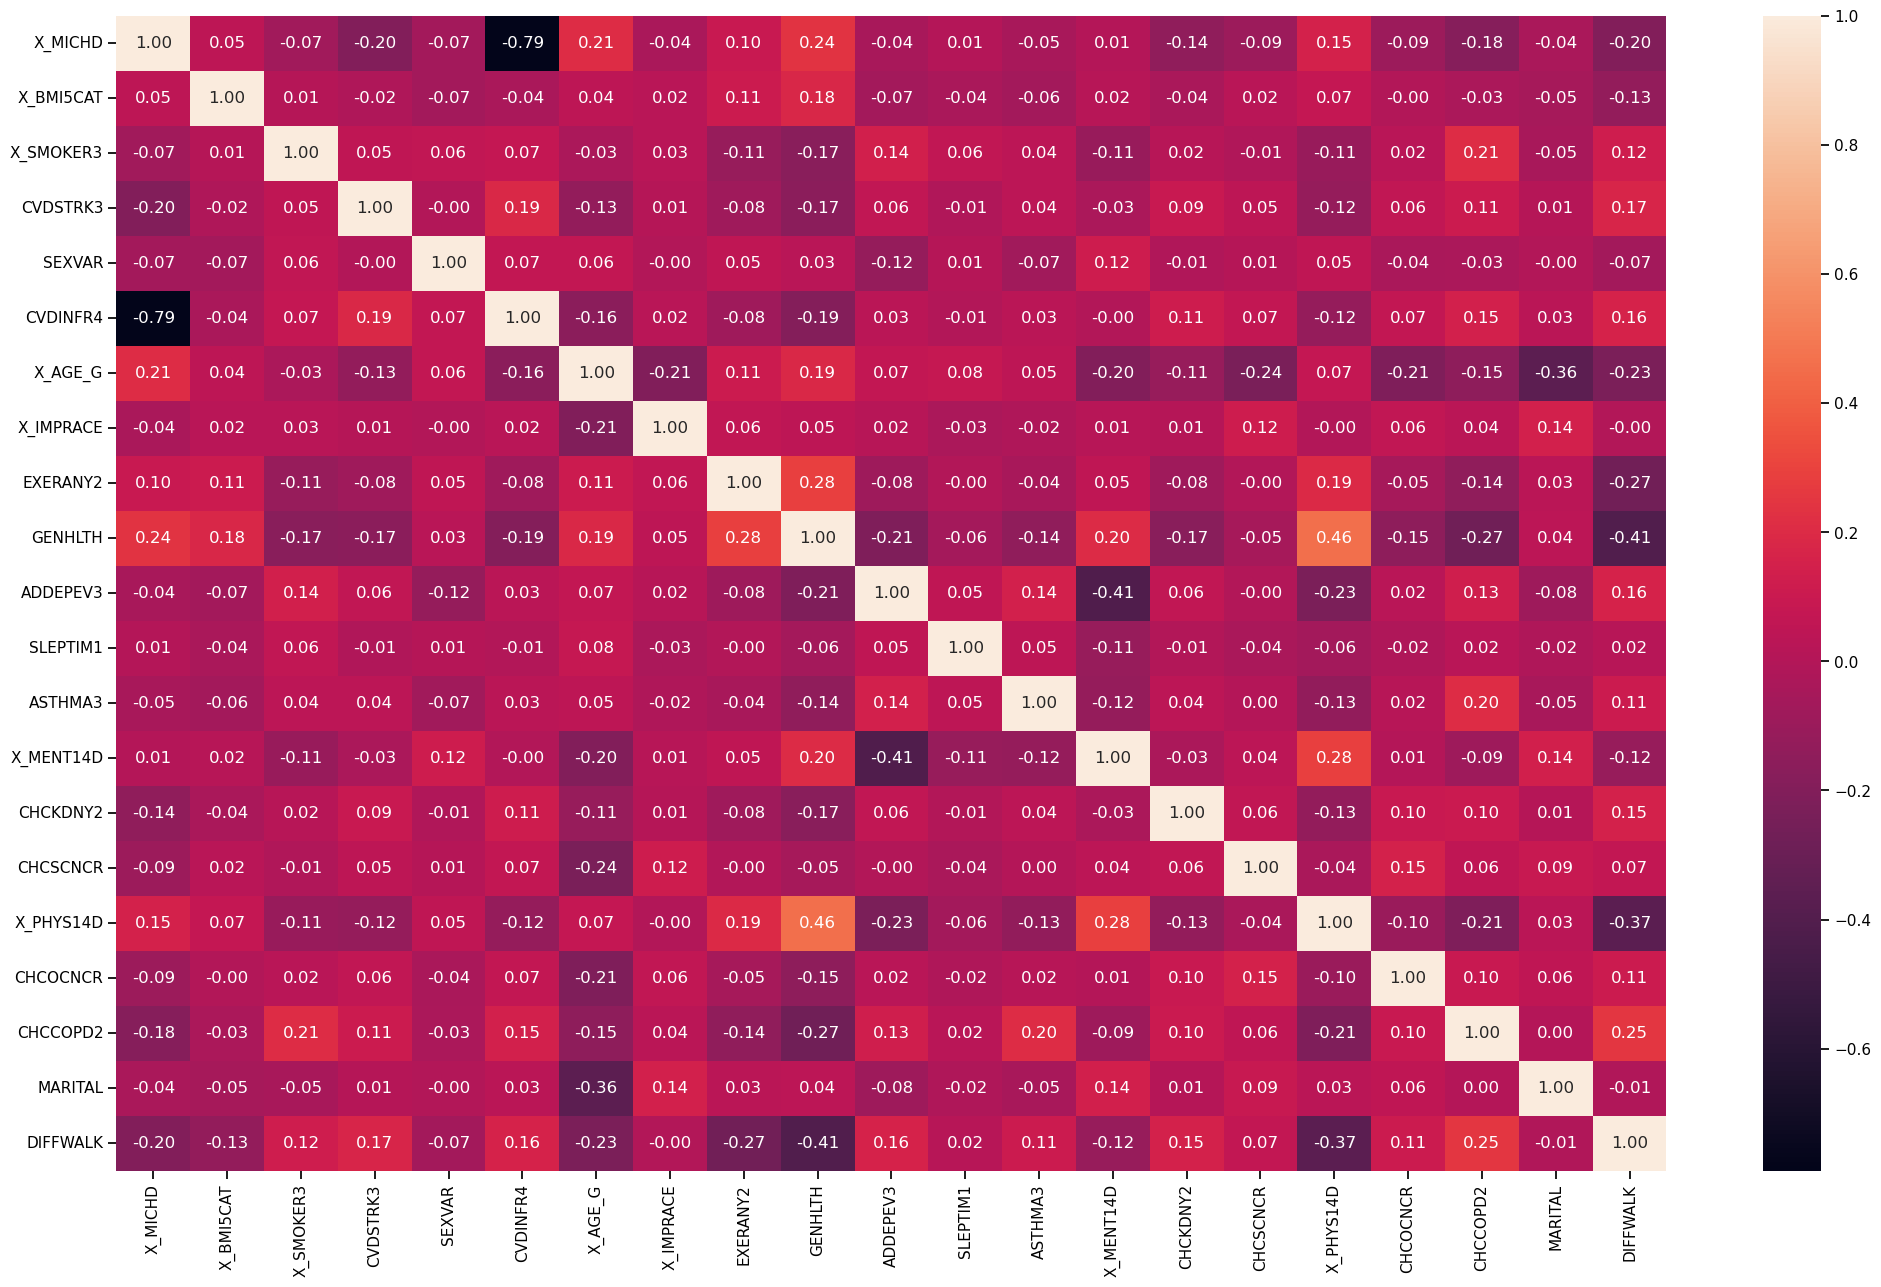

In [82]:
import seaborn as sns
corr = new2_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
plt.figure(figsize=(25,15))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

Text(0, 0.5, 'Count')

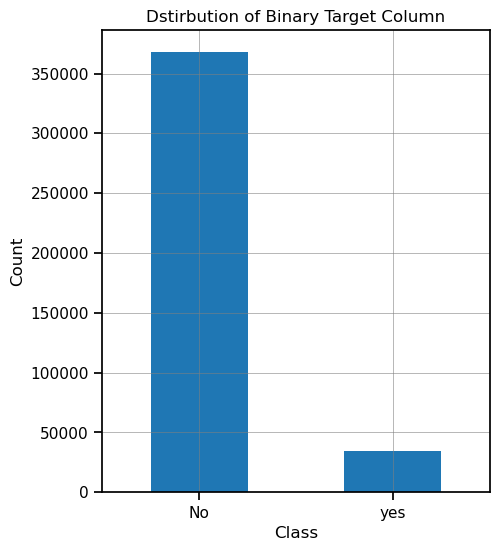

In [33]:
new2_df['X_MICHD'].value_counts().plot(kind='bar', figsize=(5,6), rot=0)
plt.title("Dstirbution of Binary Target Column")
plt.xticks(range(2), ['No','yes'])
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Class")
plt.ylabel("Count")

In [34]:
check_unique(columns_list)

unnique values in   X_MICHD is  [0. 1.]
unnique values in   X_BMI5CAT is  [1. 3. 2. 4.]
unnique values in   X_SMOKER3 is  [1 9 4 3 2]
unnique values in   CVDSTRK3 is  [2. 1. 7. 9.]
unnique values in   SEXVAR is  [2 1]
unnique values in   CVDINFR4 is  [2. 7. 1. 9.]
unnique values in   X_AGE_G is  [5 6 3 4 1 2]
unnique values in   X_IMPRACE is  [1 2 3 4 6 5]
unnique values in   EXERANY2 is  [1. 2. 7. 9.]
unnique values in   GENHLTH is  [2. 3. 1. 4. 5. 7. 9.]
unnique values in   ADDEPEV3 is  [1. 2. 9. 7.]
unnique values in   ASTHMA3 is  [1. 2. 7. 9.]
unnique values in   X_MENT14D is  [3 1 2 9]
unnique values in   CHCKDNY2 is  [2. 1. 7. 9.]
unnique values in   CHCSCNCR is  [1. 2. 7. 9.]
unnique values in   X_PHYS14D is  [2 1 3 9]
unnique values in   CHCOCNCR is  [1. 2. 7. 9.]
unnique values in   CHCCOPD2 is  [1. 2. 7. 9.]
unnique values in   MARITAL is  [2. 3. 1. 4. 5. 6. 9.]
unnique values in   DIFFWALK is  [2. 1. 7. 9.]


### Replacing Don't Know and Refused values given by users in dataset

In [35]:
cols_7=["CVDSTRK3","SEXVAR","CVDINFR4","EXERANY2","GENHLTH","ADDEPEV3","ASTHMA3","CHCKDNY2","CHCSCNCR","CHCOCNCR","CHCCOPD2",
       "DIFFWALK"]

cols_9 = ["X_SMOKER3","CVDSTRK3","SEXVAR","CVDINFR4","EXERANY2","GENHLTH","ADDEPEV3","ASTHMA3","X_MENT14D","CHCKDNY2","CHCSCNCR",
         "X_PHYS14D","CHCOCNCR","CHCCOPD2","MARITAL","DIFFWALK"]



cols_99_77= ["SLEPTIM1"]

cols=[cols_9,cols_7,cols_99_77]

In [36]:
#Function to Fill Refused and Don't Know Values 
def fill_dont_know(list1):
    for p in list1:
        
        if p == cols_9:
            
            for i in p:
                new2_df[i].mask(new2_df[i] == 9, new2_df[i].mode()[0], inplace=True)
        elif p == cols_7:
            for j in p:
                new2_df[j].mask(new2_df[j] == 7, new2_df[j].mode()[0], inplace=True)
        elif p == cols_99_77:
            for k in p:
                new2_df[k].mask(new2_df[k] == 77, new2_df[k].mean(), inplace=True)
                new2_df[k].mask(new2_df[k] == 99, new2_df[k].mean(), inplace=True)

In [37]:
fill_dont_know(cols)

## Balance Dataset

In [38]:
X=new2_df.drop('X_MICHD',axis=1)
Y=new2_df['X_MICHD']

In [39]:
from imblearn.over_sampling import RandomOverSampler
os1 = RandomOverSampler()
X_res,y_res=os1.fit_resample(X, Y)

### Chi square test

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_res,y_res)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values(by='Score',ascending=[False])

,Specs,Score
5,X_AGE_G,56028.303711
8,GENHLTH,53361.997477
4,CVDINFR4,45133.278816
15,X_PHYS14D,15681.479716
19,DIFFWALK,6483.699563
18,MARITAL,4658.311083
6,X_IMPRACE,3912.339678
1,X_SMOKER3,3239.406295
7,EXERANY2,3160.212794
17,CHCCOPD2,3084.049905


In [41]:
print(featureScores.nlargest(15,'Score'))

        Specs         Score
5     X_AGE_G  56028.303711
8     GENHLTH  53361.997477
4    CVDINFR4  45133.278816
15  X_PHYS14D  15681.479716
19   DIFFWALK   6483.699563
18    MARITAL   4658.311083
6   X_IMPRACE   3912.339678
1   X_SMOKER3   3239.406295
7    EXERANY2   3160.212794
17   CHCCOPD2   3084.049905
3      SEXVAR   1841.256502
2    CVDSTRK3   1813.117689
0   X_BMI5CAT   1150.218482
13   CHCKDNY2    935.773842
14   CHCSCNCR    925.322992


In [42]:
X_res = X_res[['X_BMI5CAT','X_SMOKER3','CVDSTRK3','SEXVAR','CVDINFR4'
            ,'X_AGE_G','X_IMPRACE','EXERANY2','GENHLTH',
             'CHCKDNY2','X_PHYS14D','CHCOCNCR','CHCCOPD2','MARITAL','DIFFWALK']]
X_res.head()

,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,CHCKDNY2,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
0,1.0,1,2.0,2,2.0,5,1,1.0,2.0,2.0,2,1.0,1.0,2.0,2.0
1,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,1,2.0,2.0,3.0,2.0
2,3.0,4,2.0,2,2.0,6,2,1.0,3.0,2.0,1,1.0,2.0,1.0,2.0
3,3.0,4,2.0,2,2.0,6,1,2.0,1.0,2.0,1,2.0,2.0,3.0,2.0
4,2.0,4,1.0,2,2.0,6,1,1.0,2.0,2.0,1,2.0,2.0,3.0,2.0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=0)

In [44]:
X_train.head()

,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,CHCKDNY2,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
489889,2.0,4,2.0,1,1.0,6,1,1.0,5.0,2.0,1,2.0,2.0,1.0,2.0
630280,4.0,4,2.0,2,1.0,1,1,1.0,3.0,2.0,2,2.0,2.0,1.0,2.0
154433,4.0,1,2.0,1,2.0,5,1,1.0,3.0,2.0,1,2.0,2.0,1.0,2.0
243938,2.0,3,2.0,1,2.0,5,6,2.0,2.0,2.0,1,2.0,2.0,1.0,2.0
317696,4.0,3,2.0,2,2.0,6,1,1.0,5.0,2.0,3,2.0,2.0,2.0,1.0


In [45]:
X_test.head()

,X_BMI5CAT,X_SMOKER3,CVDSTRK3,SEXVAR,CVDINFR4,X_AGE_G,X_IMPRACE,EXERANY2,GENHLTH,CHCKDNY2,X_PHYS14D,CHCOCNCR,CHCCOPD2,MARITAL,DIFFWALK
531629,2.0,2,2.0,1,1.0,5,2,2.0,3.0,2.0,1,1.0,2.0,1.0,1.0
32259,2.0,4,2.0,1,2.0,1,6,1.0,2.0,2.0,1,2.0,2.0,5.0,2.0
135309,3.0,3,2.0,2,2.0,6,1,1.0,4.0,2.0,3,2.0,2.0,3.0,1.0
558030,3.0,3,2.0,2,2.0,5,2,2.0,4.0,1.0,1,2.0,2.0,1.0,1.0
323548,3.0,3,1.0,2,2.0,6,1,1.0,4.0,2.0,1,2.0,2.0,3.0,2.0


In [46]:
y_train.head()

489889    1.0
630280    1.0
154433    0.0
243938    0.0
317696    1.0
Name: X_MICHD, dtype: float64

In [47]:
y_test.head()

531629    1.0
32259     0.0
135309    0.0
558030    1.0
323548    1.0
Name: X_MICHD, dtype: float64

# 1. Logistic regression

In [48]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

C:\Users\rashisingh\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
log_pred=logr.predict(X_test)

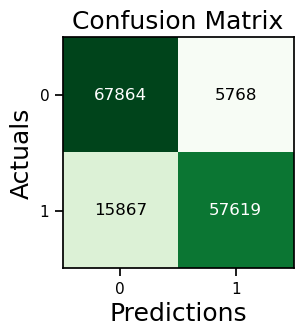

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, log_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_pred)

0.8529411764705882

In [52]:
logistic_acc=accuracy_score(y_test,log_pred)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86     73632
         1.0       0.91      0.78      0.84     73486

    accuracy                           0.85    147118
   macro avg       0.86      0.85      0.85    147118
weighted avg       0.86      0.85      0.85    147118



# 2. Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
decision_pred=classifier.predict(X_test)

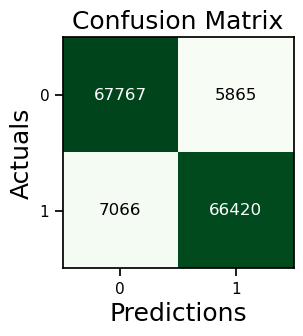

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, decision_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,decision_pred)

0.9121045691213856

In [58]:
decision_tree_acc=accuracy_score(y_test,decision_pred)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,decision_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     73632
         1.0       0.92      0.90      0.91     73486

    accuracy                           0.91    147118
   macro avg       0.91      0.91      0.91    147118
weighted avg       0.91      0.91      0.91    147118



# 3. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier  
random_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
random_classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [61]:
random_pred=random_classifier.predict(X_test)

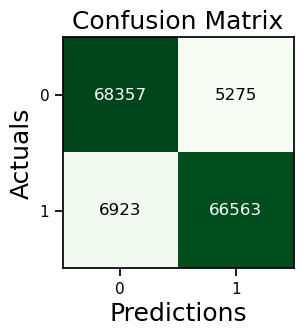

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, random_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,random_pred)

0.9170869642056036

In [64]:
random_forest_acc=accuracy_score(y_test,random_pred)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,random_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     73632
         1.0       0.93      0.91      0.92     73486

    accuracy                           0.92    147118
   macro avg       0.92      0.92      0.92    147118
weighted avg       0.92      0.92      0.92    147118



# 4. Naive Bayes 

In [66]:
from sklearn.naive_bayes import GaussianNB  
NB_classifier = GaussianNB()  
NB_classifier.fit(X_train, y_train)  

GaussianNB()

In [67]:
NB_pred=classifier.predict(X_test)

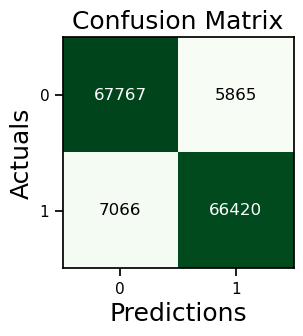

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, NB_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,NB_pred)

0.9121045691213856

In [70]:
naive_bayes_acc=accuracy_score(y_test,NB_pred)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     73632
         1.0       0.92      0.90      0.91     73486

    accuracy                           0.91    147118
   macro avg       0.91      0.91      0.91    147118
weighted avg       0.91      0.91      0.91    147118



# 5. XGBClassifier

In [72]:
XGB_classifier= XGBClassifier()  
XGB_classifier.fit(X_train , y_train)  
  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
XGB_pred=XGB_classifier.predict(X_test)

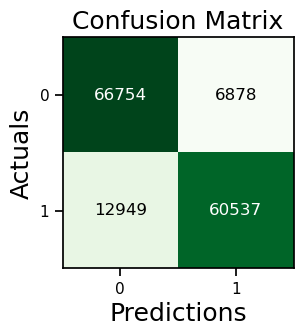

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, XGB_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,XGB_pred)

0.8652306311940076

In [76]:
xgb_acc=accuracy_score(y_test,XGB_pred)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     73632
         1.0       0.90      0.82      0.86     73486

    accuracy                           0.87    147118
   macro avg       0.87      0.87      0.86    147118
weighted avg       0.87      0.87      0.86    147118



### Model Test Accuracy Comparision

In [78]:
names = ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes",
         "XGB"]
test_accuracy=[logistic_acc, decision_tree_acc, random_forest_acc, naive_bayes_acc, xgb_acc]


In [79]:
df2 = pd.DataFrame(list(zip(names,test_accuracy)), columns =['Classifiers', 'Test_Accuracy']) 
print(df2)

           Classifiers  Test_Accuracy
0  Logistic Regression       0.852941
1        Decision Tree       0.912105
2        Random Forest       0.917087
3          Naive Bayes       0.912105
4                  XGB       0.865231


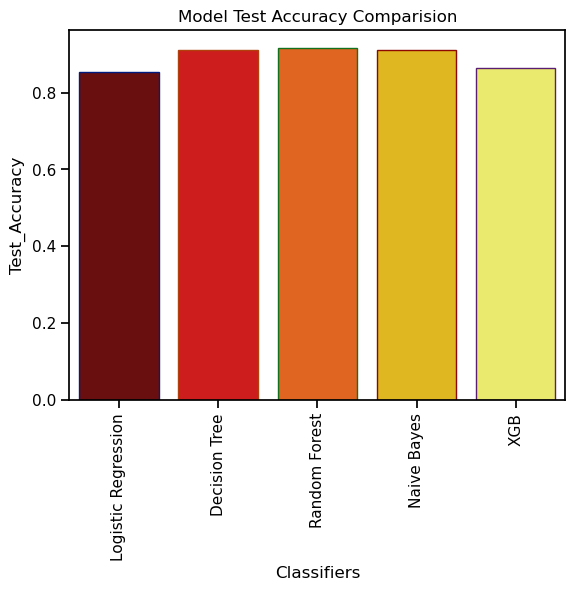

In [80]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Test_Accuracy', data=df2, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparision')
plt.show()


## PICKLING MODEL FILE

In [81]:
import pickle
pickle.dump(XGB_classifier,open('random_classifier','wb'))